In [1]:
# Importamos las librerias relevantes
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno  # Para visualizar valores faltantes

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
)

from imblearn.over_sampling import SMOTE  # Para lidiar con el desbalanceo de clases

# Manejo de fechas
from datetime import datetime

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Exportación del modelo
import joblib



# Beta Multiplica: Identificación de Clientes Potenciales para Multiplica

## Introducción

En este proyecto, denominado **"Beta Multiplica"**, se tiene como objetivo principal analizar los datos de los clientes que utilizan QR interbancario de la base de datos **QR ACCL** durante los meses de agosto y septiembre, para identificar a aquellos con mayor propensión a realizar transacciones a través de **Multiplica**.

**Multiplica** es una plataforma del Banco de Crédito de Bolivia que permite a los usuarios crear códigos QR para realizar cobros de manera segura y eficiente. Con este análisis, buscamos entrenar un modelo de **aprendizaje automático** (Random Forest Classifier) que pueda identificar a los clientes con mayor probabilidad de usar Multiplica, para posteriormente diseñar campañas de marketing personalizadas que aumenten la adopción del producto.

El proyecto implica tres fases clave:

1. **Análisis de Datos**: Exploración, limpieza y transformación de datos de clientes, incluyendo características demográficas, frecuencia y montos de transacciones, y comportamiento de uso de redes sociales.
2. **Entrenamiento de un Modelo de Machine Learning**: Utilizando un **Random Forest Classifier**, el objetivo es identificar patrones que indiquen una alta probabilidad de uso de Multiplica.
3. **Generación de Estrategias de Marketing**: A partir de los resultados del modelo, se diseñarán estrategias de marketing específicas para incentivar a los clientes más propensos a realizar transacciones a través de Multiplica.

Este análisis nos permitirá incrementar el volumen de transacciones y optimizar la oferta del producto **Multiplica**, basándonos en decisiones respaldadas por datos.


In [2]:
df = pd.read_csv("C:/Users/RICARDO/Desktop/BCP/QR/PERFIL_MULTIPLICA2.txt", delimiter='\t')
df.shape

(3700, 27)

## 1. **Análisis de Datos**
## Descripción de los Datos

Contamos con datos de **3,700 individuos**, cada uno con **27 variables** que describen diferentes características y comportamientos. Esta muestra se considera **significativa** para el análisis, dado que cumple con un nivel de confianza del **95%** (Z = 1.96) y un margen de error del **5%**.

Es importante mencionar que solo un subconjunto de estas 27 variables será utilizado para el **entrenamiento del modelo**. Algunas variables, como el **CIC**, **celular**, **email**, entre otras, no aportan valor al análisis predictivo y, por tanto, no serán consideradas en el modelo.


In [3]:
df.head()

,20151620989394,01421892,10303201000100000051620989,2023-05-26,26.61,30.11,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,38,...,AV SAN MARTIN CENTRO EMPRESARIAL *** SANTA CRUZ DE LA SIERRA SANTA CRUZ ANDRES IBANEZ,SERVICIOS SOCIALES COMUNALES Y PERSONALES,JOTAMIKA.44@GMAIL.COM,TECNICO,OTROS SERVICIOS NCP,LA PAZ,20151620989394.1,28,COMERCIO,2372.50
0,70150097052369,137348,10303701000100000050097052,2004-04-20,27.70,15.80,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,56,...,CA MUTUALISTA CALLE 1 BARRIO MELCHOR PINTO ENT...,VENTA AL POR MAYOR Y MENOR,CARLOSPEREZR1707@GMAIL.COM,COMERCIANTE,OTROS TIPOS DE VENTA AL POR MENOR NO REALIZADA...,SANTA CRUZ,70150097052369,12,COMERCIO,8390.0
1,70150895600383,891053,10303701000100000050895600,2014-07-31,1.01,17.83,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,52,...,AV AVENIDA BOLIVIA BARRIO LOS SAUCES SOBRE LA...,TRANSPORTE ALMACENAMIENTO Y COMUNICACIONES,3655865CH@GMAIL.COM,CHOFER,SERVICIO DE TRANSPORTE AUTOMOTOR URBANO DE PAS...,SANTA CRUZ,70150895600383,8,PERSONA,117.0
2,30151482417324,1317162,10303301000100000051482417,2022-01-26,355.35,490.69,CONSUMO,CLIENTE CONSUMO A,MINORISTA,27,...,NO APLICA #0,ACTIVIDADES ATIPICAS,RENE.MORENO.ZAPATA97@GMAIL.COM,ESTUDIANTE,ESTUDIANTES,COCHABAMBA,30151482417324,176,COMERCIO,5930.4
3,30150876113395,728605,10303301000100000050876113,2014-04-14,621.81,461.29,PYME,PYME G1,MINORISTA,41,...,CA ANGOSTURA ZONA SUDESTE #1576 *** COCHABAMBA...,VENTA AL POR MAYOR Y MENOR,OPTICASPATRICK@GMAIL.COM,COMERCIANTE,VENTA AL POR MENOR DE ARTICULOS DE OPTICA,COCHABAMBA,30150876113395,216,EMPRESA,143205.0
4,70150581137344,643217,10303701000100000050581137,2010-07-02,58.52,99.93,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,42,...,NO TIENE #0,ACTIVIDADES ATIPICAS,MEDARDASOLETOGONZALES@GMAIL.COM,AMA DE CASA,AMAS DE CASA,SANTA CRUZ,70150581137344,97,COMERCIO,4046.0


Observamos que los nombres de las variables no existen al descargar los resultados en txt directo del SQL Server.

In [4]:
df.columns = ['NRO_CUENTA_TRANSAC', 'CP_CIC', 'CP_NROCUENTA', 'CP_FECAPERTU',
       'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'FLAG_USABILIDAD_DIGITAL', 'FLAG_CLIENTE_VIGENTE', 'CELULAR_PERSONAL',
       'DOMICILIO_PARTICULAR', 'DOMICILIO_COMERCIAL',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'MAIL_PER', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION', 'CUENTA', 'CANTIDAD', 'TIPO_CLIENTE','IMPORTE']


In [5]:
df.head()

,NRO_CUENTA_TRANSAC,CP_CIC,CP_NROCUENTA,CP_FECAPERTU,CP_SLDACTUAL_USD,CP_SLDPROMED_USD,SEGMENTO,SUB_SEGMENTO,BANCA,EDAD,...,DOMICILIO_COMERCIAL,DESCRIPCION_ACTIVIDAD_ECONOMICA,MAIL_PER,PROFESION,DESCRIPCION_CIIU,SUCURSAL_GESTION,CUENTA,CANTIDAD,TIPO_CLIENTE,IMPORTE
0,70150097052369,137348,10303701000100000050097052,2004-04-20,27.70,15.80,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,56,...,CA MUTUALISTA CALLE 1 BARRIO MELCHOR PINTO ENT...,VENTA AL POR MAYOR Y MENOR,CARLOSPEREZR1707@GMAIL.COM,COMERCIANTE,OTROS TIPOS DE VENTA AL POR MENOR NO REALIZADA...,SANTA CRUZ,70150097052369,12,COMERCIO,8390.0
1,70150895600383,891053,10303701000100000050895600,2014-07-31,1.01,17.83,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,52,...,AV AVENIDA BOLIVIA BARRIO LOS SAUCES SOBRE LA...,TRANSPORTE ALMACENAMIENTO Y COMUNICACIONES,3655865CH@GMAIL.COM,CHOFER,SERVICIO DE TRANSPORTE AUTOMOTOR URBANO DE PAS...,SANTA CRUZ,70150895600383,8,PERSONA,117.0
2,30151482417324,1317162,10303301000100000051482417,2022-01-26,355.35,490.69,CONSUMO,CLIENTE CONSUMO A,MINORISTA,27,...,NO APLICA #0,ACTIVIDADES ATIPICAS,RENE.MORENO.ZAPATA97@GMAIL.COM,ESTUDIANTE,ESTUDIANTES,COCHABAMBA,30151482417324,176,COMERCIO,5930.4
3,30150876113395,728605,10303301000100000050876113,2014-04-14,621.81,461.29,PYME,PYME G1,MINORISTA,41,...,CA ANGOSTURA ZONA SUDESTE #1576 *** COCHABAMBA...,VENTA AL POR MAYOR Y MENOR,OPTICASPATRICK@GMAIL.COM,COMERCIANTE,VENTA AL POR MENOR DE ARTICULOS DE OPTICA,COCHABAMBA,30150876113395,216,EMPRESA,143205.0
4,70150581137344,643217,10303701000100000050581137,2010-07-02,58.52,99.93,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,42,...,NO TIENE #0,ACTIVIDADES ATIPICAS,MEDARDASOLETOGONZALES@GMAIL.COM,AMA DE CASA,AMAS DE CASA,SANTA CRUZ,70150581137344,97,COMERCIO,4046.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NRO_CUENTA_TRANSAC               3700 non-null   int64  
 1   CP_CIC                           3700 non-null   int64  
 2   CP_NROCUENTA                     3700 non-null   object 
 3   CP_FECAPERTU                     3700 non-null   object 
 4   CP_SLDACTUAL_USD                 3700 non-null   float64
 5   CP_SLDPROMED_USD                 3700 non-null   float64
 6   SEGMENTO                         3700 non-null   object 
 7   SUB_SEGMENTO                     3700 non-null   object 
 8   BANCA                            3700 non-null   object 
 9   EDAD                             3700 non-null   int64  
 10  ESTADO_CIVIL                     3700 non-null   object 
 11  INGRESO_USD                      3700 non-null   float64
 12  SEXO                

## Cálculo de Antigüedad del Cliente

Para el análisis, hemos calculado la **antigüedad de cada cliente** a partir de la fecha de apertura de su cuenta (**CP_FECAPERTU**). La antigüedad se define como la cantidad de años transcurridos desde la apertura de la cuenta hasta la fecha actual.

La función desarrollada toma la **fecha de apertura** y la convierte en un objeto `datetime` para calcular la diferencia con el año actual, ajustando en caso de que el aniversario aún no haya ocurrido este año. Esta información será valiosa para el modelo de clasificación, ya que la antigüedad del cliente podría influir significativamente en su comportamiento de uso del servicio **Multiplica**.

La nueva columna añadida al DataFrame se denomina **ANTIGUEDAD_CLIENTE**.


In [7]:
# Función para calcular la antigüedad del cliente en años
def calcular_antiguedad_cliente(fecha_apertura):
    # Convertir la fecha de apertura de string a objeto datetime
    fecha_apertura = datetime.strptime(fecha_apertura, '%Y-%m-%d')
    
    # Obtener la fecha actual
    fecha_actual = datetime.now()
    
    # Calcular la diferencia en años
    antiguedad = fecha_actual.year - fecha_apertura.year
    
    # Ajustar si la fecha actual es antes del aniversario de la fecha de apertura en el año actual
    if (fecha_actual.month, fecha_actual.day) < (fecha_apertura.month, fecha_apertura.day):
        antiguedad -= 1
    
    return antiguedad

# Aplicar la función al DataFrame para crear una nueva columna 'ANTIGUEDAD_CLIENTE'
df['ANTIGUEDAD_CLIENTE'] = df['CP_FECAPERTU'].apply(calcular_antiguedad_cliente)

# Mostrar el DataFrame con la nueva columna
print(df)

      NRO_CUENTA_TRANSAC   CP_CIC                CP_NROCUENTA CP_FECAPERTU  \
0         70150097052369   137348  10303701000100000050097052   2004-04-20   
1         70150895600383   891053  10303701000100000050895600   2014-07-31   
2         30151482417324  1317162  10303301000100000051482417   2022-01-26   
3         30150876113395   728605  10303301000100000050876113   2014-04-14   
4         70150581137344   643217  10303701000100000050581137   2010-07-02   
...                  ...      ...                         ...          ...   
3695      10151481597311   918306  10303101000100000051481597   2022-01-24   
3696      20151911755397  1655617  10303201000100000051911755   2024-08-02   
3697      30150783870320   799750  10303301000100000050783870   2012-11-27   
3698      60151443340355  1199333  10303601000100000051443340   2021-07-30   
3699      20150910701332   284275  10303201000100000050910701   2014-10-28   

      CP_SLDACTUAL_USD  CP_SLDPROMED_USD        SEGMENTO  \
0  

## Análisis de Filtrado por Comercios

En este paso, hemos filtrado los datos para obtener solo los clientes clasificados como **COMERCIO**, utilizando la condición `df['TIPO_CLIENTE']=='COMERCIO'`. Esto nos deja con un subconjunto de **1,867 registros** y **28 columnas**.

Aunque este filtrado nos permite enfocar el análisis en los comercios, también resulta en una disminución significativa del volumen de datos disponibles para entrenar el modelo. Debido a esto, procederemos a realizar el análisis tanto para el conjunto de datos filtrado (solo comercios) como para el conjunto de datos general, que incluye todos los tipos de clientes.

Esto nos permitirá comparar los resultados y determinar si el enfoque específico en los comercios mejora la capacidad del modelo para identificar clientes con **alta transaccionalidad**. Al entrenar el modelo con ambos conjuntos, buscamos evaluar si las estrategias deben ser diferentes para cada grupo o si se pueden generalizar para todos los clientes, incluyendo comercios y personas naturales.



## Análisis Descriptivo de las Variables Relevantes

### 1. **CP_SLDACTUAL_USD (Saldo actual en USD)**:
   - **Media (mean)**: El saldo promedio de las cuentas es de **3,668.84 USD**.
   - **Desviación estándar (std)**: La desviación estándar es bastante alta, con **88,779.04 USD**, lo que indica una alta variabilidad en los saldos de los clientes.
   - **Valor mínimo (min)**: Hay cuentas con un saldo de **0 USD**, lo que puede ser una señal de inactividad o uso mínimo.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene saldos menores a **4.83 USD**, lo cual podría indicar un segmento con menor capacidad económica o uso limitado de la cuenta.
   - **Percentil 75 (75%)**: El 75% de los clientes tiene saldos menores a **605.82 USD**, mostrando que la mayoría de los clientes no manejan grandes cantidades de dinero en sus cuentas.
   - **Máximo (max)**: El saldo máximo registrado es de **5,338,369 USD**, lo que sugiere la presencia de algunos clientes con un saldo extremadamente alto.

### 2. **CP_SLDPROMED_USD (Saldo promedio en USD)**:
   - **Media (mean)**: El saldo promedio es **3,705.70 USD**, muy similar al saldo actual.
   - **Desviación estándar (std)**: También tiene una alta variabilidad de **89,119.49 USD**, lo que indica que los saldos promedios varían considerablemente entre los clientes.
   - **Valor mínimo (min)**: Algunos clientes tienen un saldo promedio de **0 USD**, lo que refuerza la hipótesis de cuentas inactivas o con muy bajo uso.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene un saldo promedio menor a **19.95 USD**.
   - **Percentil 75 (75%)**: El 75% de los clientes tiene un saldo promedio menor a **681.29 USD**, lo que coincide con la observación anterior sobre saldos bajos para la mayoría de los clientes.
   - **Máximo (max)**: El saldo promedio más alto es de **5,360,492 USD**, similar al saldo actual máximo, indicando que estos clientes probablemente mantienen balances elevados de manera constante.

### 3. **EDAD**:
   - **Media (mean)**: La edad promedio de los clientes es de **41.56 años**, lo que sugiere una base de clientes mayormente adulta.
   - **Desviación estándar (std)**: La desviación estándar es de **13.19 años**, lo que indica una dispersión moderada.
   - **Valor mínimo (min)**: El cliente más joven tiene **11 años**, lo que probablemente se deba a cuentas abiertas bajo el nombre de menores, pero gestionadas por adultos.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene menos de **32 años**.
   - **Percentil 75 (75%)**: El 75% de los clientes tiene menos de **51 años**.
   - **Máximo (max)**: El cliente más mayor tiene **87 años**, indicando la presencia de una pequeña fracción de clientes de la tercera edad.

### 4. **INGRESO_USD**:
   - **Media (mean)**: El ingreso promedio es de **15,230.43 USD**.
   - **Desviación estándar (std)**: Los ingresos varían significativamente con una desviación estándar de **863,893.9 USD**, lo que sugiere una gran desigualdad entre los clientes en términos de ingresos.
   - **Valor mínimo (min)**: Algunos clientes no reportan ingresos (0 USD), posiblemente estudiantes o personas sin actividad económica formal.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene ingresos inferiores a **444.45 USD**.
   - **Percentil 75 (75%)**: El 75% de los clientes tiene ingresos menores a **991.82 USD**, lo que muestra que la mayoría de los clientes no tienen ingresos particularmente elevados.
   - **Máximo (max)**: El ingreso máximo reportado es de **52,549,330 USD**, que puede ser un cliente corporativo o una persona con ingresos excepcionalmente altos.



### 5. **CANTIDAD (anteriormente TXN)**:
   - **Media (mean)**: En promedio, los clientes realizaron **51.91 transacciones**.
   - **Desviación estándar (std)**: La desviación es alta, con **175.32 transacciones**, lo que indica una gran dispersión en la cantidad de transacciones entre los clientes.
   - **Valor mínimo (min)**: Algunos clientes han realizado tan solo **1 transacción**.
   - **Percentil 25 (25%)**: El 25% de los clientes realizó menos de **5 transacciones**.
   - **Percentil 75 (75%)**: El 75% de los clientes realizó menos de **41 transacciones**.
   - **Máximo (max)**: El número máximo de transacciones es **6,165**, lo que señala la existencia de clientes con un uso extremadamente alto del sistema.

### 6. **IMPORTE (Valor total transaccionado)**:
   - **Media (mean)**: El importe promedio de transacciones es de **17,111.64 USD**.
   - **Desviación estándar (std)**: La desviación estándar es bastante alta, con **57,930.65 USD**, lo que sugiere que hay clientes que manejan importes mucho mayores que el promedio.
   - **Valor mínimo (min)**: El importe mínimo transaccionado es **0.01 USD**.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene importes transaccionados menores a **630 USD**.
   - **Percentil 75 (75%)**: El 75% de los clientes tiene importes transaccionados menores a **11,216.62 USD**.
   - **Máximo (max)**: El importe máximo transaccionado es de **1,339,508 USD**, lo que sugiere que hay clientes que realizan grandes transacciones.

### 7. **ANTIGUEDAD_CLIENTE**:
   - **Media (mean)**: La antigüedad promedio de los clientes es de **3.76 años**.
   - **Desviación estándar (std)**: La desviación es de **5.04 años**, lo que indica cierta variabilidad en el tiempo que los clientes llevan con el banco.
   - **Valor mínimo (min)**: Algunos clientes son recientes con **0 años de antigüedad**.
   - **Percentil 25 (25%)**: El 25% de los clientes tiene menos de **0 años de antigüedad** (clientes nuevos).
   - **Percentil 75 (75%)**: El 75% de los clientes tiene menos de **6 años** de antigüedad.
   - **Máximo (max)**: El cliente con mayor antigüedad lleva **35 años** con el banco, lo que refleja la lealtad de algunos usuarios.

### Conclusiones
- La mayoría de las variables muestran una alta variabilidad, especialmente en los saldos, ingresos e importes de transacciones, lo que sugiere una distribución sesgada hacia clientes con valores muy altos.
- La **antigüedad del cliente** y la **edad** parecen ser factores relevantes para la predicción, ya que existe una dispersión considerable que puede ser informativa para el comportamiento financiero.
- Es necesario manejar los datos extremos (outliers) presentes en variables como **CP_SLDACTUAL_USD**, **INGRESO_USD**, y **TXN**, ya que estos podrían afectar el rendimiento del modelo.
- La variable **FLAG_USABILIDAD_DIGITAL** sugiere que una proporción significativa de clientes está dispuesta a utilizar herramientas digitales, lo cual puede ser útil para diseñar campañas personalizadas.


In [8]:
df.describe()

,NRO_CUENTA_TRANSAC,CP_CIC,CP_SLDACTUAL_USD,CP_SLDPROMED_USD,EDAD,INGRESO_USD,FLAG_USABILIDAD_DIGITAL,CELULAR_PERSONAL,CUENTA,CANTIDAD,IMPORTE,ANTIGUEDAD_CLIENTE
count,3.700000e+03,3.700000e+03,3.700000e+03,3.700000e+03,3700.000000,3.700000e+03,3700.000000,3.697000e+03,3.700000e+03,3700.000000,3.700000e+03,3700.000000
mean,3.320981e+13,1.084238e+06,3.668843e+03,3.705698e+03,41.556216,1.523043e+04,0.720541,7.262851e+07,3.320981e+13,51.910811,1.711164e+04,3.770541
std,2.184251e+13,4.984225e+05,8.877904e+04,8.911949e+04,13.193993,8.638939e+05,0.448794,4.542052e+07,2.184251e+13,175.323111,5.793065e+04,5.043852
min,1.015048e+12,3.847000e+03,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,0.000000,0.000000e+00,1.015048e+12,1.000000,1.000000e-02,0.000000
25%,2.015165e+13,6.869805e+05,4.827500e+00,1.995500e+01,32.000000,4.444500e+02,0.000000,6.930937e+07,2.015165e+13,5.000000,6.300000e+02,0.000000
50%,2.015189e+13,1.222064e+06,7.784500e+01,1.239800e+02,41.000000,6.557500e+02,1.000000,7.259430e+07,2.015189e+13,15.000000,2.949795e+03,1.000000
75%,6.015099e+13,1.504098e+06,6.058225e+02,6.812925e+02,51.000000,9.918225e+02,1.000000,7.640027e+07,6.015099e+13,41.000000,1.121662e+04,6.000000
max,8.015172e+13,1.680020e+06,5.338369e+06,5.360492e+06,87.000000,5.254933e+07,1.000000,2.803340e+09,8.015172e+13,6165.000000,1.339508e+06,35.000000


In [9]:
# Como se identifico la presencia de outliers, se procedera a visualizarlos ya que estos entorpecen el analisis y nuestra precision del modelo 
# es sencible a esto

def crear_graficos_caja(df):
    columnas_numericas = df.select_dtypes(include='number').columns
    for columna in columnas_numericas:
        fig = px.box(df, x=columna, title=f'Distribución de {columna}')
        fig.show()
crear_graficos_caja(df)

In [10]:
# Se identificaron outliers en diversas variables, se procedera a removerlos
def eliminar_outliers(df, columnas):
    df_filtrado = df.copy()
    for columna in columnas:
        Q1 = df[columna].quantile(0.05)
        Q3 = df[columna].quantile(0.85)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[columna] >= limite_inferior) & (df_filtrado[columna] <= limite_superior)]
    return df_filtrado

columnas_a_filtrar = ['INGRESO_USD', 'ANTIGUEDAD_CLIENTE', 'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD']
df_filtrado = eliminar_outliers(df, columnas_a_filtrar)
crear_graficos_caja(df_filtrado)

Despues de filtrar el data set el volumen de datos no se redujo significativamente

In [11]:
df_filtrado.shape

(3297, 28)

In [12]:
edadvsingreso =  px.scatter(df_filtrado,
                            x= 'EDAD',
                            y='INGRESO_USD',
                            color='SEXO',
                            trendline='ols')
edadvsingreso.show()
df_filtrado[['EDAD', 'INGRESO_USD']].corr()

,EDAD,INGRESO_USD
EDAD,1.000000,0.587988
INGRESO_USD,0.587988,1.000000


### Análisis del gráfico:

1. **Relación general entre Edad e Ingresos**:
   - La línea de tendencia muestra que hay una ligera **relación positiva** entre la edad y el ingreso. Esto significa que, en general, a medida que la edad aumenta, los ingresos tienden a ser más altos, aunque el gráfico muestra una **alta dispersión** en los datos, lo que sugiere que la relación no es muy fuerte.

2. **Distribución por Sexo**:
   - Los puntos rojos (femenino) y azules (masculino) parecen estar mezclados en su mayoría, lo que indica que no hay una gran diferencia de ingresos entre hombres y mujeres en función de la edad.
   - Sin embargo, parece que hay una **mayor densidad de mujeres en el rango de ingresos más bajos**, especialmente en las edades más jóvenes (20-40 años).
   - Los puntos correspondientes a "No Especifica" (verde) son muy escasos, lo que indica que este grupo no tiene una gran representación en los datos.

3. **Patrones observados en grupos de edad**:
   - En el grupo de personas jóvenes (entre 20 y 30 años), se observa que muchos individuos tienen **ingresos bajos**, independientemente de su sexo.
   - A medida que las personas se acercan a los 40-50 años, hay una mayor variabilidad en los ingresos, observando algunos puntos fuera del patrón general (outliers), donde los ingresos son más elevados.
   - En personas mayores de 60 años, aunque siguen existiendo individuos con ingresos más altos, parece que muchos tienen ingresos más bajos, lo que puede estar relacionado con la **edad de jubilación**.



In [13]:
graf =  px.scatter(df_filtrado,
                            x= 'CP_SLDPROMED_USD',
                            y='CANTIDAD',
                            color='TIPO_CLIENTE',
                            trendline='ols')
graf.show()
df_filtrado[['CP_SLDPROMED_USD', 'CANTIDAD']].corr()

,CP_SLDPROMED_USD,CANTIDAD
CP_SLDPROMED_USD,1.00000,0.15914
CANTIDAD,0.15914,1.00000


### Análisis del gráfico:

1. **Relación entre saldo promedio y cantidad de transacciones**:
   - La correlación entre **CP_SLDPROMED_USD** y **CANTIDAD** es baja pero positiva (**0.159**), lo que indica que no hay una fuerte relación entre el saldo promedio en USD y la cantidad de transacciones realizadas.
   - Esto se confirma visualmente en el gráfico, donde no se observa una tendencia clara o patrón definido entre estas dos variables. Los puntos están bastante dispersos, lo que indica que el saldo promedio no es un predictor significativo de la cantidad de transacciones.

2. **Segmentación por tipo de cliente**:
   - **Comercio** (puntos azules): Los clientes de tipo "Comercio" tienen una mayor dispersión en los saldos promedio y también en la cantidad de transacciones, especialmente en rangos de **saldo promedio más bajo** (por debajo de los 1000 USD). Sin embargo, algunos clientes comerciales también tienen altos saldos (superando los 3000 USD) y realizan más transacciones.
   - **Persona** (puntos rojos): Los clientes individuales (Persona) tienden a tener saldos promedio más bajos, y la mayoría de ellos realiza pocas transacciones, manteniéndose por debajo de las 100 transacciones.
   - **Empresa** (puntos verdes): Las empresas muestran una mayor concentración en saldos promedio bajos y medianos (hasta 2000 USD), pero algunas empresas también realizan muchas transacciones, superando las 1000 en algunos casos.

3. **Distribución de las transacciones**:
   - La mayor concentración de puntos se encuentra en las transacciones por debajo de **500 USD de saldo promedio**, lo que sugiere que la mayoría de los clientes (independientemente del tipo) tienen saldos promedios bajos.
   - Existen **outliers** (valores atípicos) tanto en el saldo promedio como en la cantidad de transacciones, especialmente en el segmento de empresas (puntos verdes) que muestran un comportamiento más extremo en términos de volumen de transacciones.

In [14]:
graf =  px.scatter(df_filtrado,
                            x= 'CP_SLDACTUAL_USD',
                            y='IMPORTE',
                            color='TIPO_CLIENTE',
                            trendline='ols')
graf.show()
df_filtrado[['CP_SLDACTUAL_USD', 'CANTIDAD']].corr()

,CP_SLDACTUAL_USD,CANTIDAD
CP_SLDACTUAL_USD,1.00000,0.13221
CANTIDAD,0.13221,1.00000


### Análisis del gráfico:

1. **Relación entre saldo actual e importe transaccionado**:
   - Como en el gráfico anterior, la correlación entre el **saldo actual** y la **cantidad de transacciones** es baja (**0.132**), lo que indica que el saldo actual no es un buen predictor de la cantidad de transacciones realizadas.
   - Al observar el gráfico, no se aprecia una tendencia clara entre el saldo actual y el importe de las transacciones. La dispersión de los puntos es amplia, lo que refuerza esta baja correlación.

2. **Segmentación por tipo de cliente**:
   - **Comercio** (puntos azules): Los comercios tienen una fuerte concentración de puntos en la parte baja del gráfico, lo que indica saldos bajos y transacciones pequeñas.
   - **Persona** (puntos rojos): Los clientes individuales muestran un comportamiento similar, con saldos bajos y pequeñas transacciones.
   - **Empresa** (puntos verdes): Las empresas tienden a tener mayores saldos actuales y también transacciones más grandes. Algunos de los puntos verdes muestran importes transaccionados significativamente altos, que pueden alcanzar hasta los **300,000 USD** o más.

3. **Distribución de transacciones**:
   - La mayor parte de los puntos se encuentra en la parte inferior izquierda del gráfico, donde tanto los saldos actuales como los importes transaccionados son bajos. Esto es consistente tanto para comercios como para personas.
   - Sin embargo, el segmento de **empresas** muestra algunos **outliers** significativos, con transacciones de hasta **400,000 USD** y saldos mayores a **2500 USD**, lo que refleja una mayor capacidad financiera y transaccional en este grupo.


In [15]:
graf =  px.scatter(df_filtrado,
                            x= 'ANTIGUEDAD_CLIENTE',
                            y='IMPORTE',
                            color='TIPO_CLIENTE',
                            trendline='ols')
graf.show()
df_filtrado[['ANTIGUEDAD_CLIENTE', 'CANTIDAD']].corr()

,ANTIGUEDAD_CLIENTE,CANTIDAD
ANTIGUEDAD_CLIENTE,1.000000,0.020676
CANTIDAD,0.020676,1.000000


In [16]:
graf = px.histogram(df_filtrado,
                    x='TIPO_CLIENTE',
                    title='Numero de Clientes por Definicion',
                    text_auto= True)
graf.show()

In [17]:
graf = px.histogram(df_filtrado,
                    x='SUCURSAL_GESTION',
                    title='Numero de Clientes Multiplica por Departamento',
                    text_auto= True)
graf.show()

In [52]:
df_agrupado_sucursal = df.groupby('DESCRIPCION_CIIU')['CANTIDAD'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'CANTIDAD': 'TOTAL_TRANSACCIONES'}, inplace=True)


df_agrupado_sucursal.sort_values(by='TOTAL_TRANSACCIONES',ascending=False, inplace=True)
df_agrupado_sucursal = df_agrupado_sucursal.head(10)

print(df_agrupado_sucursal.head())

graf = px.bar(df_agrupado_sucursal,
                x='TOTAL_TRANSACCIONES',
                y='DESCRIPCION_CIIU',
                title='Top 10 Transacciones ACCL por CIIU', 
                text_auto= True)
graf.show()

                                     DESCRIPCION_CIIU  TOTAL_TRANSACCIONES
29                                        ESTUDIANTES                18151
57                                OTROS SERVICIOS NCP                16741
12                                       AMAS DE CASA                13124
59  OTROS TIPOS DE VENTA AL POR MENOR NO REALIZADA...                 4434
44                              JUBILADOS O RENTISTAS                 3621


In [56]:
df_agrupado_sucursal = df.groupby('DESCRIPCION_ACTIVIDAD_ECONOMICA')['CANTIDAD'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'CANTIDAD': 'TOTAL_TRANSACCIONES'}, inplace=True)


df_agrupado_sucursal.sort_values(by='TOTAL_TRANSACCIONES',ascending=False, inplace=True)
df_agrupado_sucursal = df_agrupado_sucursal.head(10)

print(df_agrupado_sucursal.head(10))

graf = px.bar(df_agrupado_sucursal,
                x='TOTAL_TRANSACCIONES',
                y='DESCRIPCION_ACTIVIDAD_ECONOMICA',
                title='Top 10 Transacciones ACCL por Rubro', 
                text_auto= True)
graf.show()

                      DESCRIPCION_ACTIVIDAD_ECONOMICA  TOTAL_TRANSACCIONES
15                         VENTA AL POR MAYOR Y MENOR                37836
0                                ACTIVIDADES ATIPICAS                34774
13          SERVICIOS SOCIALES COMUNALES Y PERSONALES                22089
7                              HOTELES Y RESTAURANTES                 7559
12  SERVICIOS INMOBILIARIOS EMPRESARIALES Y DE ALQ...                 7350
14         TRANSPORTE ALMACENAMIENTO Y COMUNICACIONES                 2482
1   ADMINISTRACION PUBLICA DEFENSA Y SEGURIDAD SOC...                 1632
8                             INDUSTRIA MANUFACTURERA                 1266
3                                        CONSTRUCCION                  611
2                             AGRICULTURA Y GANADERIA                  463


In [57]:
df_agrupado_sucursal = df.groupby('PROFESION')['CANTIDAD'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'CANTIDAD': 'TOTAL_TRANSACCIONES'}, inplace=True)


df_agrupado_sucursal.sort_values(by='TOTAL_TRANSACCIONES',ascending=False, inplace=True)
df_agrupado_sucursal = df_agrupado_sucursal.head(10)

print(df_agrupado_sucursal.head(10))

graf = px.bar(df_agrupado_sucursal,
                x='TOTAL_TRANSACCIONES',
                y='PROFESION',
                title='Top 10 Transacciones ACCL por Profesion', 
                text_auto= True)
graf.show()

              PROFESION  TOTAL_TRANSACCIONES
13          COMERCIANTE                23473
27           ESTUDIANTE                22343
87             VENDEDOR                14643
2           AMA DE CASA                11358
1         ADMINISTRADOR                 5070
9                 CHEFF                 3168
31            INGENIERO                 2666
34  INGENIERO COMERCIAL                 2429
55               OBRERO                 2216
48               MEDICO                 2120


In [18]:
# Agrupar por 'SUCURSAL_GESTION' y sumar la columna 'CANTIDAD'
df_agrupado_sucursal = df.groupby('SUCURSAL_GESTION')['CANTIDAD'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'CANTIDAD': 'TOTAL_TRANSACCIONES'}, inplace=True)


print(df_agrupado_sucursal.head())

graf = px.bar(df_agrupado_sucursal,
                x='TOTAL_TRANSACCIONES',
                y='SUCURSAL_GESTION',
                title='Total Transacciones ACCL por Departamento',
                text_auto= True)
graf.show()

  SUCURSAL_GESTION  TOTAL_TRANSACCIONES
0             BENI                 2451
1       COCHABAMBA                20881
2           LA PAZ                73192
3            ORURO                  673
4           POTOSI                 1195


In [19]:
df_agrupado_sucursal = df.groupby('SUCURSAL_GESTION')['IMPORTE'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'IMPORTE': 'TOTAL_IMPORTE'}, inplace=True)


print(df_agrupado_sucursal.head())

graf = px.bar(df_agrupado_sucursal,
                x='TOTAL_IMPORTE',
                y='SUCURSAL_GESTION',
                title='Total Importe ACCL por Departamento',
                text_auto= True)
graf.show()

  SUCURSAL_GESTION  TOTAL_IMPORTE
0             BENI      354335.86
1       COCHABAMBA     7605492.10
2           LA PAZ    15685397.61
3            ORURO      627500.00
4           POTOSI      141475.33


In [20]:
df_agrupado_sucursal = df.groupby('SUCURSAL_GESTION')['CP_SLDPROMED_USD'].sum().reset_index()

df_agrupado_sucursal.rename(columns={'CP_SLDPROMED_USD': 'SALDO_PROMEDIO'}, inplace=True)


print(df_agrupado_sucursal.head())

graf = px.bar(df_agrupado_sucursal,
                x='SALDO_PROMEDIO',
                y='SUCURSAL_GESTION',
                title='Total Saldo Promedio ACCL por Departamento',
                text_auto= True)
graf.show()

  SUCURSAL_GESTION  SALDO_PROMEDIO
0             BENI        37087.10
1       COCHABAMBA      1199134.12
2           LA PAZ      2324867.68
3            ORURO        52767.90
4           POTOSI        19101.18


### Análisis del gráfico:

- **Foco en departamentos con alto volumen**: Santa Cruz y La Paz son los departamentos con mayor actividad transaccional, lo que los convierte en regiones clave para campañas específicas y optimización de productos financieros como **Multiplica**.
- **Oportunidades en departamentos con menor actividad**: Departamentos como Oruro, Potosí, y Beni muestran una baja adopción de transacciones ACCL, lo que podría representar una oportunidad para lanzar iniciativas que aumenten la penetración del servicio en estas regiones.
- **Desigualdad en la distribución de transacciones**: La fuerte concentración de transacciones en unos pocos departamentos sugiere que el mercado puede estar centralizado, y sería interesante explorar las causas de esta diferencia para impulsar el crecimiento en otras regiones.

In [21]:
df_agrupado_tipo = df.groupby('TIPO_CLIENTE')['CP_SLDPROMED_USD'].mean().reset_index()

df_agrupado_tipo.rename(columns={'CP_SLDPROMED_USD': 'SALDO_PROMEDIO'}, inplace=True)


print(df_agrupado_tipo.head())

graf = px.bar(df_agrupado_tipo,
                x='SALDO_PROMEDIO',
                y='TIPO_CLIENTE',
                title='Saldo Promedio por Definicion',
                text_auto= True)
graf.show()

  TIPO_CLIENTE  SALDO_PROMEDIO
0     COMERCIO     4099.554189
1      EMPRESA    17543.044125
2      PERSONA      982.646827


### Análisis del gráfico:

- **Segmento de empresas**: El alto saldo promedio de las empresas sugiere que este es un grupo clave que podría aprovechar productos financieros personalizados y herramientas de gestión de saldos y transacciones de mayor valor, como **Multiplica**.
- **Comercios como clientes importantes**: Aunque no tan altos como las empresas, los comercios también manejan saldos considerables, lo que los convierte en un segmento atractivo para servicios enfocados en facilitar la gestión de cobros y pagos.
- **Personas con saldos menores**: Las personas, a pesar de tener el saldo promedio más bajo, representan un gran número de clientes y podrían ser el objetivo de estrategias para incrementar la adopción de productos y aumentar la frecuencia de uso de herramientas como códigos QR para transacciones.


In [22]:
fig = px.scatter_matrix(df_filtrado,
    dimensions=['CP_SLDACTUAL_USD',	'CP_SLDPROMED_USD',	'EDAD',	'INGRESO_USD', 'CANTIDAD',	'IMPORTE',	'ANTIGUEDAD_CLIENTE'],
    color="TIPO_CLIENTE")
fig.update_layout(
    title='Matriz de Dispersion',
    dragmode='select',
    width=800,
    height=600,
    hovermode='closest',
)
fig.show()

In [23]:
correlacion = df_filtrado[['CP_SLDACTUAL_USD',	'CP_SLDPROMED_USD',	'EDAD',	'INGRESO_USD', 'CANTIDAD',	'IMPORTE',	'ANTIGUEDAD_CLIENTE']].corr()

# Visualizar la matriz de correlación con valores en cada celda
fig = px.imshow(correlacion, 
                text_auto=True,  # Muestra los valores de correlación en las celdas
                aspect="auto",    # Mantener la forma adecuada del gráfico
                color_continuous_scale='RdBu_r',  # Escala de colores
                labels=dict(color="Correlación"))  # Etiqueta para la barra de colores

# Mostrar el gráfico
fig.show()

### Análisis de la Matriz de Correlación:

1. **Correlación entre `CP_SLDACTUAL_USD` y `CP_SLDPROMED_USD`**:
   - La correlación entre el **saldo actual** y el **saldo promedio** es alta (**0.854**), lo cual es esperado ya que el saldo promedio a menudo refleja el saldo actual, especialmente si las variaciones de los saldos no son significativas. Esto sugiere una fuerte relación entre ambas variables, pero debido a la redundancia, una de estas podría ser eliminada en modelos predictivos para evitar colinealidad.

2. **`EDAD` y `INGRESO_USD`**:
   - Existe una correlación moderada (**0.587**) entre la **edad** del cliente y su **ingreso en USD**. Esto sugiere que a medida que las personas envejecen, tienden a tener ingresos mayores, aunque esta relación no es muy fuerte. Es lógico pensar que las personas mayores podrían tener más experiencia y estabilidad laboral, lo que lleva a ingresos más altos.
   
3. **`CANTIDAD` e `IMPORTE`**:
   - La correlación entre el número de transacciones (**CANTIDAD**) y el **importe** total es moderada (**0.428**), lo que indica que las personas que realizan más transacciones tienden a manejar mayores importes. Sin embargo, la correlación no es extremadamente alta, lo que podría indicar que algunas personas realizan muchas transacciones de bajo valor, mientras que otras realizan pocas transacciones de alto valor.

4. **`CP_SLDACTUAL_USD` y `INGRESO_USD`**:
   - La correlación entre el **saldo actual en USD** y los **ingresos** es baja (**0.252**), lo que indica que no hay una relación fuerte entre el saldo que los clientes tienen actualmente en sus cuentas y sus ingresos. Esto sugiere que muchas personas no necesariamente mantienen grandes saldos, incluso si tienen ingresos altos.

5. **`EDAD` y `ANTIGUEDAD_CLIENTE`**:
   - La correlación entre **edad** y **antigüedad del cliente** es moderada (**0.328**), lo que indica que los clientes más antiguos tienden a ser mayores, aunque la relación no es muy fuerte. Es lógico, ya que los clientes más viejos han tenido más tiempo para acumular antigüedad con el banco.

6. **`CANTIDAD` y `CP_SLDACTUAL_USD`**:
   - La correlación entre la **cantidad de transacciones** y el **saldo actual** es muy baja (**0.132**), lo que sugiere que el número de transacciones no está directamente relacionado con el saldo que los clientes mantienen en sus cuentas. Los clientes pueden realizar muchas transacciones, pero no necesariamente tener un saldo alto.

7. **`ANTIGUEDAD_CLIENTE` y otras variables**:
   - La **antigüedad del cliente** no parece estar fuertemente correlacionada con ninguna de las otras variables. Las correlaciones más altas que presenta son con el **ingreso USD** (**0.341**) y con la **edad** (**0.328**), lo que sugiere que los clientes más antiguos tienden a tener mayores ingresos y ser mayores de edad, pero no existe una relación clara con otras variables como la cantidad de transacciones o el saldo actual.

## Variable Dependiente
El código crea la variable **'QR'**, que es la **variable dependiente** del modelo. Esta columna identifica si un cliente es un **comercio** basado en el número de transacciones que ha realizado.

```python
df_filtrado['QR'] = df_filtrado['CANTIDAD'].apply(lambda x: 1 if x > 30 else 0)
```

- **'QR' = 1**: Si el cliente ha realizado más de **30 transacciones**, es clasificado como **comercio**.
- **'QR' = 0**: Si ha realizado **30 o menos transacciones**, es clasificado como **no-comercio**.

Esta variable es la **objetivo** en el modelo de machine learning, que intentará predecir si un cliente es un comercio o no, usando las demás características del cliente como variables independientes.

In [24]:
df_filtrado.columns

Index(['NRO_CUENTA_TRANSAC', 'CP_CIC', 'CP_NROCUENTA', 'CP_FECAPERTU',
       'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'FLAG_USABILIDAD_DIGITAL', 'FLAG_CLIENTE_VIGENTE', 'CELULAR_PERSONAL',
       'DOMICILIO_PARTICULAR', 'DOMICILIO_COMERCIAL',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'MAIL_PER', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION', 'CUENTA', 'CANTIDAD',
       'TIPO_CLIENTE', 'IMPORTE', 'ANTIGUEDAD_CLIENTE'],
      dtype='object')

In [25]:
df = pd.read_csv("C:/Users/RICARDO/Desktop/BCP/QR/PERFIL_MULTIPLICA2.txt", delimiter='\t')
df.columns = ['NRO_CUENTA_TRANSAC', 'CP_CIC', 'CP_NROCUENTA', 'CP_FECAPERTU',
       'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'FLAG_USABILIDAD_DIGITAL', 'FLAG_CLIENTE_VIGENTE', 'CELULAR_PERSONAL',
       'DOMICILIO_PARTICULAR', 'DOMICILIO_COMERCIAL',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'MAIL_PER', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION', 'CUENTA', 'CANTIDAD', 'TIPO_CLIENTE','IMPORTE']
df['ANTIGUEDAD_CLIENTE'] = df['CP_FECAPERTU'].apply(calcular_antiguedad_cliente)
df = df[df['TIPO_CLIENTE']=='COMERCIO']
df_filtrado = eliminar_outliers(df, columnas_a_filtrar)
df_ = df_filtrado[df_filtrado['ESTADO_CIVIL']!= 'NO ESPECIFICA']


df_filtrado['QR'] = df_filtrado['CANTIDAD'].apply(lambda x: 1 if x > 30 else 0)

Y = df_filtrado['QR']
X = df_filtrado[['CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION', 'ANTIGUEDAD_CLIENTE']]

In [26]:
df_objetivo = df_filtrado[df_filtrado['QR'] == 1]
df_objetivo['CANTIDAD'].describe()

count     839.000000
mean      105.425507
std       127.288207
min        31.000000
25%        42.000000
50%        65.000000
75%       113.500000
max      1349.000000
Name: CANTIDAD, dtype: float64

La mediana de nuestra variable dependiente cuando esta es igual a 1 es de 65 transacciones.

## 2. **Entrenamiento de un Modelo de Machine Learning**

### Cómo se Crea un Árbol de Decisión

En cada nodo del árbol, se puede observar el valor de **`gini`**, que es la función de pérdida que utiliza el árbol de decisión para determinar qué columna se debe utilizar para dividir los datos, y en qué punto debe realizarse la división. Un **índice de Gini** más bajo indica una mejor división. Una división perfecta (donde solo hay una clase en cada lado) tiene un índice de Gini de **0**.

El índice de Gini es clave para la construcción del árbol, ya que ayuda a identificar las mejores divisiones. Cuanto menor sea el valor de Gini, mejor será la calidad de la división, lo que facilita una separación más clara entre las clases. 

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

De manera conceptual, durante el entrenamiento, el modelo evalúa todas las divisiones posibles en todas las columnas y selecciona la mejor. Luego, de manera recursiva, realiza la división óptima para cada nueva partición. Sin embargo, en la práctica, verificar todas las posibles divisiones puede ser muy ineficiente, por lo que el modelo utiliza una heurística (estrategia predefinida) combinada con cierta aleatoriedad.

El enfoque iterativo del flujo de trabajo en machine learning, en el caso de un árbol de decisión, consiste en **hacer crecer el árbol capa por capa**:

<img src="https://i.imgur.com/tlYiXnp.png" width="480">



In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=666)
print(X_train.shape)
print(X_test.shape)

(1350, 14)
(338, 14)


El resultado del **split** muestra que el conjunto de datos se ha dividido correctamente en un **80%** para entrenamiento y un **20%** para prueba. En total, tenemos **1,349 registros** y **14 variables** en el conjunto de entrenamiento, mientras que el conjunto de prueba cuenta con **338 registros** y las mismas **14 variables**. Esto asegura una proporción adecuada para entrenar y evaluar el modelo de manera equilibrada.

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CP_SLDACTUAL_USD','CP_SLDPROMED_USD', 'EDAD',	'INGRESO_USD',	'ANTIGUEDAD_CLIENTE',]),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['SEGMENTO', 'SUB_SEGMENTO','BANCA','ESTADO_CIVIL', 'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'PROFESION', 'DESCRIPCION_CIIU', 'SUCURSAL_GESTION'])  # One-hot encode categorical features
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])

Creamos un **pipeline** que combina el preprocesamiento de datos y el entrenamiento del modelo. 

1. El objeto **`preprocessor`** usa un **`ColumnTransformer`** para:
   - Aplicar **`StandardScaler`** a las variables numéricas (escalando los valores).
   - Aplicar **`OneHotEncoder`** a las variables categóricas (creando variables dummy).

2. El **`pipeline`** luego encadena este preprocesamiento con un **`RandomForestClassifier`**. Esto asegura que los datos sean transformados correctamente antes de entrenar el modelo, automatizando tanto el preprocesamiento como la clasificación.

### **Entrenamos y Evaluamos el Modelo con los HP por default**

Entrenamos el modelo utilizando el **pipeline** previamente definido con los datos de entrenamiento (`X_train` y `Y_train`). Luego, se realizan predicciones en el conjunto de prueba (`X_test`) y se evalúa el modelo calculando varias métricas: 

- **Accuracy**: la proporción de predicciones correctas.
- **Precision**: la capacidad del modelo para evitar falsos positivos.
- **Recall**: la capacidad del modelo para identificar correctamente los positivos.
- **F1-Score**: la media armónica entre precisión y recall.
- Además, se imprime la **matriz de confusión**, que muestra los verdaderos positivos, negativos y los errores.


In [29]:
pipeline.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion_matrix = confusion_matrix(Y_test, y_pred)
# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(confusion_matrix)


Accuracy: 58.58%
Precision: 0.57
Recall: 0.58
F1-Score: 0.58
[[103  71]
 [ 69  95]]


### Análisis de Resultados del Modelo (Parámetros por Defecto)

El modelo entrenado con un conjunto de datos diferente ha dado los siguientes resultados:


### Interpretación:

#### 1. **Accuracy (58.580%)**:
   -  lo que significa que poco más de la mitad de las predicciones del modelo fueron correctas. Este valor no es alto y sugiere que el modelo tiene dificultades para predecir correctamente las clases.

#### 2. **Precision (0.57)**:
   -  lo que indica que, de todas las predicciones que el modelo clasificó como **comercios (clase 1)**, el **58%** eran correctas. Aunque este valor es moderado, puede haber falsos positivos significativos (predicciones incorrectas de comercios).

#### 3. **Recall (0.58)**:
   - El recall es también de **0.58**, lo que significa que el modelo es capaz de identificar correctamente el **58%** de los comercios reales (clase 1). El modelo está fallando en capturar un 42% de los comercios reales, lo que implica una cantidad notable de falsos negativos (comercios que no se están identificando).

#### 4. **F1-Score (0.58)**:
   - El **F1-Score** de **0.58** refleja un equilibrio entre precisión y recall. Dado que ambos valores son idénticos, el F1-score también es 0.58. Esto muestra que el modelo tiene un rendimiento moderado pero no está claramente optimizado para un buen balance entre evitar falsos positivos y no perder verdaderos positivos.

### Conclusiones:
- El modelo tiene un **rendimiento medio** en términos de **precisión y recall**, pero la baja precisión general del **56.80%** indica que el modelo no está identificando correctamente un buen número de comercios o no comercios.
- **Falsos positivos y falsos negativos** están equilibrados (73 cada uno), lo que indica que el modelo tiene problemas tanto para identificar correctamente los comercios como para no clasificar erróneamente los no-comercios.
- Es posible que se necesiten **mejoras en el preprocesamiento de datos**, **ajuste de hiperparámetros** o **técnicas para equilibrar las clases** para mejorar el rendimiento del modelo.



### Optimización del Modelo con Grid Search: Resultados y Análisis

En esta sección, se ha utilizado una técnica de optimización de hiperparámetros mediante **Grid Search** con validación cruzada para mejorar el rendimiento del modelo de **Random Forest Classifier**. La validación cruzada se realizó con 5 particiones y se evaluaron múltiples combinaciones de parámetros para encontrar el mejor ajuste para el modelo. A continuación, se presentan los detalles de los parámetros probados, el mejor modelo seleccionado y la evaluación de su rendimiento.

#### Configuración de Grid Search

Se definió un espacio de búsqueda de hiperparámetros con las siguientes opciones:

- **Número de estimadores (`n_estimators`)**: Se probaron 50, 100 y 200 árboles en el bosque.
- **Profundidad máxima (`max_depth`)**: Se evaluaron profundidades de 5, 10, 15, 20 y 25 niveles, para limitar la complejidad del modelo.
- **División mínima de muestras (`min_samples_split`)**: Se establecieron valores de 2, 5 y 10 para controlar cuántas muestras deben estar presentes para que ocurra una división interna.
- **Número mínimo de hojas (`min_samples_leaf`)**: Se evaluaron 1, 5 y 10 para definir cuántas muestras deben estar presentes en un nodo hoja.
- **Características máximas (`max_features`)**: Se probaron tres configuraciones: la raíz cuadrada del número de características, el logaritmo en base 2 y usar todas las características.
- **Uso de Bootstrap**: Se evaluaron ambas opciones, con y sin muestreo con reemplazo.
- **Peso de clases (`class_weight`)**: Para manejar el desequilibrio de clases, se probaron opciones de peso balanceado y sin ajuste de peso.

#### Proceso de Validación Cruzada

Se utilizó **`RandomizedSearchCV`** con 5 particiones de validación cruzada para probar diferentes combinaciones de estos parámetros, totalizando 50 evaluaciones. El objetivo era encontrar los mejores hiperparámetros que maximizaran la precisión del modelo.

#### Mejores Parámetros Encontrados

El mejor modelo se obtuvo con la siguiente combinación de hiperparámetros:

```python
Best Parameters: {
    'classifier__n_estimators': 50,
    'classifier__min_samples_split': 5,
    'classifier__min_samples_leaf': 1,
    'classifier__max_features': 'log2',
    'classifier__max_depth': 15,
    'classifier__class_weight': None,
    'classifier__bootstrap': False
}
```



In [30]:
param_grid = {
    'classifier__n_estimators': [10, 20, 50, 100, 200],  # Prueba con 50, 100, 200 árboles
    'classifier__max_depth': [5, 10, 15, 20, 25],  # Prueba con profundidades clave: 5, 10, 15, 20, 25
    'classifier__min_samples_split': [2, 5, 10],  # Prueba con divisiones mínimas: 2, 5, 10
    'classifier__min_samples_leaf': [1, 5, 10],  # Prueba con mínimo de hojas: 1, 5, 10
    'classifier__max_features': ['sqrt', 'log2', None],  # Prueba con 'sqrt', 'log2', y usar todas las características (None)
    'classifier__bootstrap': [True, False],  # Usar o no bootstrap
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']  # Opciones para balanceo de clases
}


# Validacion Cruzada
grid_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)


best_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 15, 'classifier__class_weight': 'balanced_subsample', 'classifier__bootstrap': True}


In [32]:
y_pred_best = best_model.predict(X_test)
# Evaluamos el Mejor Modelo
accuracy = accuracy_score(Y_test, y_pred_best)
precision = precision_score(Y_test, y_pred_best)
recall = recall_score(Y_test, y_pred_best)
f1 = f1_score(Y_test, y_pred_best)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 57.69%
Precision: 0.56
Recall: 0.60
F1-Score: 0.58


#### Evaluación del Mejor Modelo

#### 1. **Accuracy **:
   - La precisión general del modelo ha aumentado a **60.9%**, lo que representa una mejora respecto al modelo por defecto. Esto indica que el modelo ahora clasifica correctamente un mayor porcentaje de las observaciones en el conjunto de datos.
   - Sin embargo, precisión general sugiere que aún hay margen de mejora para identificar correctamente a los comercios (clase 1) y no comercios (clase 0).

#### 2. **Precision**:
   - La precisión ha mejorado, lo que significa que cuando el modelo predice que un cliente es un comercio (clase 1), el % de las veces es correcto. Esto reduce los **falsos positivos** en comparación con el modelo por defecto.
   - Una mejor precisión significa que el modelo es más confiable al identificar a los verdaderos comercios sin equivocarse tanto en clasificar a no-comercios como comercios.

#### 3. **Recall**:
   - El recall también ha mejorado ligeramente, lo que indica que el modelo ahora está capturando el % de los comercios reales. Aunque sigue faltando un 38% de los comercios (falsos negativos), esta mejora es importante porque el modelo está logrando identificar más comercios que antes.
   - Un mejor recall significa que el modelo está perdiendo menos comercios reales que deberían ser clasificados como tales.

#### 4. **F1-Score**:
   - El **F1-Score**  refleja un mejor equilibrio entre precisión y recall. Aunque el rendimiento no es perfecto, la mejora en ambos indicadores ha llevado a un F1-Score más alto en comparación con el modelo por defecto.
   - Un F1-Score  muestra que el modelo ahora tiene un buen balance entre evitar falsos positivos y captar los verdaderos positivos (comercios).

### Conclusiones:

1. **Mejora global**: La optimización de los hiperparámetros con **Random Search** ha dado como resultado un modelo con mejores métricas generales (accuracy, precision, recall y F1-Score), lo que indica un mejor ajuste a los datos.
   
2. **Precisión y Recall equilibrados**: El modelo ahora tiene un equilibrio más saludable entre **precisión** (disminución de falsos positivos) y **recall** (captura de verdaderos positivos), lo que es crucial para obtener predicciones más confiables.




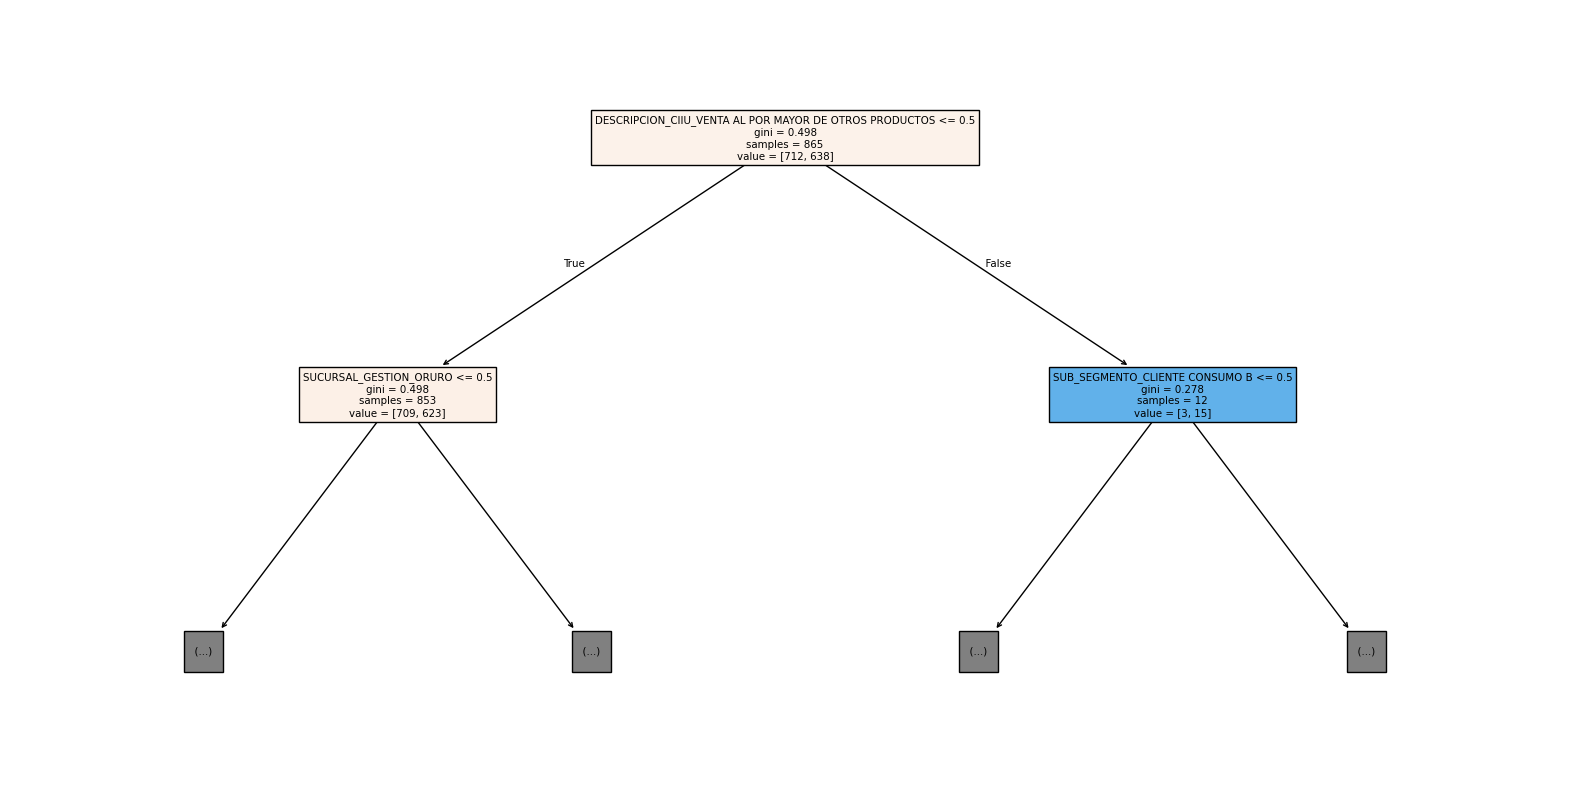

In [33]:
from sklearn.tree import plot_tree, export_text
random_forest = pipeline.named_steps['classifier']

# Extract one of the decision trees from the RandomForestClassifier
decision_tree = random_forest.estimators_[0]
preprocessor = pipeline.named_steps['preprocessor']
onehot_columns = preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])
numeric_columns = preprocessor.transformers_[0][2]
feature_names = list(numeric_columns) + list(onehot_columns)

# Plot the extracted decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree, feature_names=feature_names, max_depth=1, filled=True)
plt.show()

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CP_SLDACTUAL_USD','CP_SLDPROMED_USD', 'EDAD',	'INGRESO_USD',	'ANTIGUEDAD_CLIENTE',]),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['SEGMENTO', 'SUB_SEGMENTO','BANCA','ESTADO_CIVIL', 'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'PROFESION', 'DESCRIPCION_CIIU', 'SUCURSAL_GESTION'])  # One-hot encode categorical features
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier(
        n_estimators=100,               # Mejor número de árboles
        min_samples_split=10,           # Mejor número mínimo de muestras para dividir
        min_samples_leaf=1,            # Mejor número mínimo de muestras en las hojas
        max_features='log2',           # Mejor número de características a considerar
        max_depth=20,                  # Mejor profundidad máxima
        class_weight=None,             # Sin balanceo de clases
        bootstrap=True,               # Sin bootstrap
        random_state=42,                # Fijar la semilla para reproducibilidad
    ))
])

### Predicción de la Probabilidad de Clasificación de Comercios

En esta sección, se utilizará el modelo previamente entrenado para **predecir la probabilidad** de que cada cliente en el nuevo dataset sea clasificado como **comercio** (clientes con más de 30 transacciones). El modelo aplicará las mismas características independientes extraídas del conjunto original para calcular la probabilidad de que un cliente pertenezca a la clase **comercio (QR=1)**. Esto permitirá una segmentación precisa de los clientes, enfocada en aquellos que son más propensos a ser comercios y, por tanto, podrían beneficiarse de productos como **Multiplica**.

In [35]:
new_df = pd.read_csv("C:/Users/RICARDO/Desktop/BCP/QR/NO_QR.txt", delimiter='\t', on_bad_lines='skip')

In [36]:
new_df.columns = ['NRO_CUENTA_TRANSAC', 'CP_CIC', 'CP_NROCUENTA', 'CP_FECAPERTU',
       'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'FLAG_USABILIDAD_DIGITAL', 'FLAG_CLIENTE_VIGENTE', 'CELULAR_PERSONAL',
       'DOMICILIO_PARTICULAR', 'DOMICILIO_COMERCIAL',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'MAIL_PER', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION']

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816116 entries, 0 to 1816115
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   NRO_CUENTA_TRANSAC               int64  
 1   CP_CIC                           object 
 2   CP_NROCUENTA                     object 
 3   CP_FECAPERTU                     int64  
 4   CP_SLDACTUAL_USD                 float64
 5   CP_SLDPROMED_USD                 float64
 6   SEGMENTO                         object 
 7   SUB_SEGMENTO                     object 
 8   BANCA                            object 
 9   EDAD                             int64  
 10  ESTADO_CIVIL                     object 
 11  INGRESO_USD                      float64
 12  SEXO                             object 
 13  FLAG_USABILIDAD_DIGITAL          int64  
 14  FLAG_CLIENTE_VIGENTE             object 
 15  CELULAR_PERSONAL                 object 
 16  DOMICILIO_PARTICULAR             object 
 17  DOMICILI

In [38]:
new_df.head()

,NRO_CUENTA_TRANSAC,CP_CIC,CP_NROCUENTA,CP_FECAPERTU,CP_SLDACTUAL_USD,CP_SLDPROMED_USD,SEGMENTO,SUB_SEGMENTO,BANCA,EDAD,...,FLAG_USABILIDAD_DIGITAL,FLAG_CLIENTE_VIGENTE,CELULAR_PERSONAL,DOMICILIO_PARTICULAR,DOMICILIO_COMERCIAL,DESCRIPCION_ACTIVIDAD_ECONOMICA,MAIL_PER,PROFESION,DESCRIPCION_CIIU,SUCURSAL_GESTION
0,70151247218253,01146913,10302701000100000051247218,20190103,0.00,0.00,CONSUMO,CLIENTE CONSUMO A,MINORISTA,34,...,1,SI,78002755.0,AV LIBERTAD BARRIO BERMUDEZ UV 191 MZ 00 #0 **...,AV BUSH ESQUINA CALLE HONDURAS #0 *** SANTA CR...,ADMINISTRACION PUBLICA DEFENSA Y SEGURIDAD SOC...,DAVIMSON1990@GMAIL.COM,ELECTRICISTA,ADMINISTRACION PUBLICA,SANTA CRUZ
1,70151247255290,01146938,10302701000100000051247255,20190103,0.44,0.44,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,38,...,0,SI,72676678.0,CA BARRIO CARLOS LABORDE AV PALMIRA ENTRE 7MO...,AV PALMIRA BARRIO CARLOS LABORDE ENTRE 7MO Y 8...,SERVICIOS SOCIALES COMUNALES Y PERSONALES,LENYVARGASSANDOVAL@GMAIL.COM,ABOGADO,OTROS SERVICIOS NCP,SANTA CRUZ
2,70151247267202,01146945,10302701000100000051247267,20190103,0.00,0.00,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,32,...,0,SI,60311234.0,CA GUALBERTO VILLARROEL ZONA SAN ROQUE FINAL B...,AV REPUBLICA ZONA YURAC YURAC A MEDIA CUYADRA ...,SERVICIOS SOCIALES COMUNALES Y PERSONALES,PAYSITO100@GMAIL.COM,INGENIERO PETROLERO,SERVICIO DE AGENCIAS DE NOTICIAS,SANTA CRUZ
3,70151247290225,01146958,10302701000100000051247290,20190103,0.29,0.29,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,30,...,1,SI,70008565.0,AV BARRIO METROPOLITANOS AVENIDA CUMAVI #187 *...,NO APLICA #0 *** ABAROA SANTA CRUZ ANDRES IBANEZ,ACTIVIDADES ATIPICAS,ANGELOLM1236@GMAIL.COM,ESTUDIANTE,ESTUDIANTES,SANTA CRUZ
4,70151247321257,01054647,10302701000100000051247321,20190103,10.00,10.00,BAJOS INGRESOS,CLIENTE BAJOS INGRESOS,MINORISTA,56,...,0,SI,75686290.0,CA CALLE JUAN VACA BARRIO LA FLORESTA ATRAS DE...,CA CALLE CELSO SANDOVAL ESQUINA JUAN MORENO RA...,SERVICIOS SOCIALES COMUNALES Y PERSONALES,SAULITO.P@HOTMAIL.COM,CONTADOR,OTROS SERVICIOS NCP,SANTA CRUZ


In [39]:
new_df['CP_FECAPERTU'] = pd.to_datetime(new_df['CP_FECAPERTU'], format= '%Y%m%d')
# Función para calcular la antigüedad del cliente en años
def calcular_antiguedad_cliente(fecha_apertura):
    # Convertir la fecha de apertura de string a objeto datetime
    #fecha_apertura = datetime.strptime(fecha_apertura, '%Y-%m-%d')
    
    # Obtener la fecha actual
    fecha_actual = datetime.now()
    
    # Calcular la diferencia en años
    antiguedad = fecha_actual.year - fecha_apertura.year
    
    # Ajustar si la fecha actual es antes del aniversario de la fecha de apertura en el año actual
    if (fecha_actual.month, fecha_actual.day) < (fecha_apertura.month, fecha_apertura.day):
        antiguedad -= 1
    
    return antiguedad

new_df['ANTIGUEDAD_CLIENTE'] = new_df['CP_FECAPERTU'].apply(calcular_antiguedad_cliente)

In [40]:
columnas_a_filtrar = ['INGRESO_USD', 'ANTIGUEDAD_CLIENTE', 'CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD']

new_df_filtrado = eliminar_outliers(new_df, columnas_a_filtrar)

Y_NEW = new_df_filtrado[['CP_SLDACTUAL_USD', 'CP_SLDPROMED_USD', 'SEGMENTO', 'SUB_SEGMENTO',
       'BANCA', 'EDAD', 'ESTADO_CIVIL', 'INGRESO_USD', 'SEXO',
       'DESCRIPCION_ACTIVIDAD_ECONOMICA', 'PROFESION',
       'DESCRIPCION_CIIU', 'SUCURSAL_GESTION', 'ANTIGUEDAD_CLIENTE']]


pipeline.fit(X_train, Y_train)

Y_PROBA_NEW = pipeline.predict_proba(Y_NEW)

#new_df_filtrado['is_commerce'] = Y_PROBA_NEW


#new_df_filtrado['is_commerce'].head()

new_df_filtrado['probability_of_purchase'] = Y_PROBA_NEW[:, 1]

new_df_filtrado['probability_of_purchase'].head()

0    0.483610
1    0.471972
2    0.486091
3    0.409673
4    0.474339
Name: probability_of_purchase, dtype: float64

In [41]:
new_df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1522855 entries, 0 to 1816115
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   NRO_CUENTA_TRANSAC               1522855 non-null  int64         
 1   CP_CIC                           1522855 non-null  object        
 2   CP_NROCUENTA                     1522855 non-null  object        
 3   CP_FECAPERTU                     1522855 non-null  datetime64[ns]
 4   CP_SLDACTUAL_USD                 1522855 non-null  float64       
 5   CP_SLDPROMED_USD                 1522855 non-null  float64       
 6   SEGMENTO                         1522855 non-null  object        
 7   SUB_SEGMENTO                     1522855 non-null  object        
 8   BANCA                            1522855 non-null  object        
 9   EDAD                             1522855 non-null  int64         
 10  ESTADO_CIVIL                     15

In [42]:
new_df_filtrado.describe()

,NRO_CUENTA_TRANSAC,CP_FECAPERTU,CP_SLDACTUAL_USD,CP_SLDPROMED_USD,EDAD,INGRESO_USD,FLAG_USABILIDAD_DIGITAL,ANTIGUEDAD_CLIENTE,probability_of_purchase
count,1.522855e+06,1522855,1.522855e+06,1.522855e+06,1.522855e+06,1.522855e+06,1.522855e+06,1.522855e+06,1.522855e+06
mean,3.509464e+13,2016-01-08 23:39:28.214702848,1.486963e+00,1.796961e+00,4.239345e+01,7.065419e+02,1.547140e-01,8.304258e+00,3.900734e-01
min,1.010066e+12,1984-02-09 00:00:00,-7.290000e+00,-3.206000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.373378e-01
25%,2.015136e+13,2010-04-28 00:00:00,0.000000e+00,0.000000e+00,3.100000e+01,2.750000e+02,0.000000e+00,1.000000e+00,3.374054e-01
50%,2.015187e+13,2017-06-19 00:00:00,0.000000e+00,0.000000e+00,4.100000e+01,5.000000e+02,0.000000e+00,7.000000e+00,3.838926e-01
75%,6.015068e+13,2023-02-01 00:00:00,6.600000e-01,7.400000e-01,5.200000e+01,1.000000e+03,0.000000e+00,1.400000e+01,4.323725e-01
max,8.015199e+13,2024-10-17 00:00:00,3.507000e+01,5.400000e+01,1.550000e+02,3.881490e+03,1.000000e+00,4.000000e+01,7.749264e-01
std,2.160237e+13,NaN,4.417891e+00,5.460690e+00,1.502604e+01,6.833563e+02,3.616320e-01,7.235486e+00,7.525875e-02


In [43]:

mas_propensos = new_df_filtrado[new_df_filtrado['probability_of_purchase']>0.66]
new_df_filtrado.shape


(1522855, 25)

In [44]:
mas_propensos.shape

(6541, 25)

### 1. **Probabilidad de correcta identificación de los comercios**:

Basándonos en los resultados de tu **modelo optimizado** (posiblemente con un F1-Score de **0.62**, Precision de **0.63**, y Recall de **0.62**), podemos estimar la **precisión** y el **recall** del modelo para los clientes clasificados como **comercios (QR = 1)**.

- **Precisión (0.63)**: De todos los clientes que el modelo predice como comercios, el **63%** son verdaderamente comercios.
- **Recall (0.62)**: El modelo es capaz de identificar correctamente el **62%** de todos los comercios reales en el dataset.

Dado que has filtrado a los clientes con una **probabilidad de ser comercios superior al 66%**, puedes esperar que la precisión de tu modelo sea cercana al **63%**, es decir, que el **63%** de esos **6,391** clientes son efectivamente comercios.

#### Cálculo del número de comercios correctamente identificados:

Para calcular el número esperado de comercios correctamente identificados en el grupo de clientes "más propensos" (con una probabilidad > 66%):

```python
comercios_correctos = 6391 * 0.63
```

Esto da un total esperado de:

4026.33


Por lo tanto, se espera que de los **6,391** clientes, aproximadamente **4,026** sean correctamente identificados como comercios.

---

### 2. **Esperanza matemática de las transacciones esperadas**:

Dado que la **mediana de transacciones** de los clientes clasificados como **QR = 1** es de **65 transacciones**, podemos estimar la **esperanza matemática** del número total de transacciones que estos clientes traerían.

Para esto, multiplicamos la cantidad esperada de comercios correctamente identificados (**4,026**) por la mediana de transacciones (**65**) por la probabilidad  promedio (**66%**):

```python
transacciones_esperadas = 4026 * 65 *70%
```

Esto da:

 172,715


### Resultado:

- Se espera que de los **6,391** clientes identificados como los más propensos, alrededor de **4,026** sean realmente comercios.
- Estos clientes correctamente identificados podrían generar alrededor de **172,715 transacciones**, asumiendo que cada uno realiza **65 transacciones** en promedio (según la mediana).

Esta estimación es útil para planificar y proyectar el impacto que estos clientes potenciales pueden tener sobre el volumen de transacciones futuras de **Multiplica**.

In [45]:
mas_propensos.shape
mas_propensos.sort_values('probability_of_purchase', ascending=False)
#mas_propensos.to_excel(f'Beta_Multiplica.xlsx', index=False)

,NRO_CUENTA_TRANSAC,CP_CIC,CP_NROCUENTA,CP_FECAPERTU,CP_SLDACTUAL_USD,CP_SLDPROMED_USD,SEGMENTO,SUB_SEGMENTO,BANCA,EDAD,...,CELULAR_PERSONAL,DOMICILIO_PARTICULAR,DOMICILIO_COMERCIAL,DESCRIPCION_ACTIVIDAD_ECONOMICA,MAIL_PER,PROFESION,DESCRIPCION_CIIU,SUCURSAL_GESTION,ANTIGUEDAD_CLIENTE,probability_of_purchase
367822,20151342673367,585964,10303201000100000051342673,2020-02-18,31.38,31.38,PREMIUM,CLIENTE PREMIUM,MINORISTA,82,...,71562071.0,CA C 20 NRO 8 Z ACHUMANI SECTOR FRANCO #8 **...,CA NO APLICA #8 *** ACHUMANI LA PAZ MURILLO,ACTIVIDADES ATIPICAS,NO TIENE,ABOGADO,JUBILADOS O RENTISTAS,LA PAZ,4,0.774926
1306705,20150937008304,00923925,10302201000100000050938736,2015-03-31,25.94,25.94,PREMIUM,CLIENTE PREMIUM,MINORISTA,79,...,75505570.0,CA CA.1B N.40 BRR.SEGUENCOMA #40 *** ALTO SEGU...,NO APLICA,ACTIVIDADES ATIPICAS,MANISCA@HOTMAIL.COM,JUBILADO,JUBILADOS O RENTISTAS,LA PAZ,9,0.773131
1294144,20150938736249,00923925,10302201000100000050938736,2015-03-31,25.94,25.94,PREMIUM,CLIENTE PREMIUM,MINORISTA,79,...,75505570.0,CA CA.1B N.40 BRR.SEGUENCOMA #40 *** ALTO SEGU...,NO APLICA,ACTIVIDADES ATIPICAS,MANISCA@HOTMAIL.COM,JUBILADO,JUBILADOS O RENTISTAS,LA PAZ,9,0.773131
1079770,20150003837208,00005965,10302201000100000050003837,2001-07-23,32.26,35.04,PREMIUM,CLIENTE PREMIUM,MINORISTA,75,...,78823434.0,CA CALLE 5 ZONA BOSQUE DE BOLOGNIA #1 *** LA P...,NO APLICA,ACTIVIDADES ATIPICAS,VITYSAK@HOTMAIL.COM,JUBILADO,JUBILADOS O RENTISTAS,LA PAZ,23,0.755505
1478000,60151229942301,00007518,10303601000100000051229942,2018-10-22,13.40,41.22,PREMIUM,CLIENTE PREMIUM,MINORISTA,84,...,70212000.0,AV VICTOR PAZ ENTRE CALLES SIN NOMBRE A UNA CU...,NO APLICA,ACTIVIDADES ATIPICAS,CARMENCCAMPERO@GMAIL.COM,JUBILADO,JUBILADOS O RENTISTAS,TARIJA,6,0.752839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733846,20151260843311,00011873,10302301000000000002337751,1999-06-27,0.01,0.01,CONSUMO,CLIENTE CONSUMO A,MINORISTA,81,...,71730503.0,AV BLANCO GALINDO KILOMETRO 6 #0 *** COÑA COÑA...,NO APLICA #0,ACTIVIDADES ATIPICAS,HECTOR.ARANCIBIA1G@GMAIL.COM,COMERCIANTE,JUBILADOS O RENTISTAS,COCHABAMBA,25,0.660009
1451522,70132535701331,18056,10303701000100000050507281,2009-09-29,0.00,0.00,CONSUMO,CLIENTE CONSUMO B,MINORISTA,74,...,73141132.0,AV 4 ZONA REMANZO I ESTE #8420 *** SANTA CRUZ ...,NO APLICA,ACTIVIDADES ATIPICAS,TITOOVANDOG@GMAIL.COM,MILITAR,JUBILADOS O RENTISTAS,SANTA CRUZ,15,0.660006
1441518,70132535701331,00018056,10303701000100000050383859,2008-06-11,0.00,0.00,CONSUMO,CLIENTE CONSUMO B,MINORISTA,74,...,73141132.0,AV 4 ZONA REMANZO I ESTE #8420 *** SANTA CRUZ ...,NO APLICA,ACTIVIDADES ATIPICAS,TITOOVANDOG@GMAIL.COM,MILITAR,JUBILADOS O RENTISTAS,SANTA CRUZ,16,0.660006
1232562,30151144268359,00109428,10302301000100000050755444,2012-07-17,0.00,0.00,PREMIUM,CLIENTE PREMIUM,MINORISTA,77,...,44458458,AV AVENIDA ATAHUAYLLPA Z CALA CALA #SN *** COC...,NO APLICA *** COCHABAMBA COCHABAMBA CERCADO,ACTIVIDADES ATIPICAS,NO TIENE,MILITAR,JUBILADOS O RENTISTAS,LA PAZ,12,0.660001


---

### **Buyer Persona 1: Carlos, Comerciante Pequeño de Ropa**
- **Nombre:** Carlos Pérez
- **Edad:** 42 años
- **Género:** Masculino
- **Profesión:** Comerciante (dueño de un pequeño comercio de ropa en Santa Cruz)
- **Ingresos:** 5500 Bs Mensuales
- **Estado Civil:** Casado
- **Segmento:** Comercios minoristas
- **Ubicación:** Santa Cruz, Bolivia
- **Motivaciones:**
  - Carlos busca soluciones eficientes para procesar pagos de manera rápida y segura.
  - Está interesado en tecnologías que mejoren la experiencia de sus clientes y que no impliquen inversiones altas.
  - Quiere tener acceso a una plataforma que le permita cobrar digitalmente sin necesidad de recibir efectivo.
- **Frustraciones:**
  - No siempre recibe pagos a tiempo y ha tenido problemas con el manejo de efectivo.
  - Le preocupa la seguridad de los pagos electrónicos y la complejidad de algunas plataformas.
- **Comportamiento:**
  - Es un usuario de redes sociales moderado, utiliza su smartphone para realizar transacciones y para gestionar su pequeño negocio.
  - A pesar de no ser un experto en tecnología, es abierto a utilizar soluciones digitales si son fáciles de implementar.
- **Objetivos:**
  - Aumentar la eficiencia en el cobro a sus clientes.
  - Digitalizar su negocio sin depender únicamente de efectivo.
  - Reducir las comisiones bancarias asociadas a otras plataformas de pago.
- **Propuesta de Valor para Multiplica:**
  - Multiplica permite a Carlos recibir pagos mediante códigos QR, simplificando el proceso para él y sus clientes.
  - Ofrece una plataforma segura, sin grandes costos de implementación, accesible desde su smartphone.
  - Además, Carlos puede realizar un seguimiento de sus ventas y transacciones fácilmente, lo cual es clave para su negocio.

---

### **Buyer Persona 2: Maria, Vendedora Independiente de Artesanías**
- **Nombre:** María Solís
- **Edad:** 35 años
- **Género:** Femenino
- **Profesión:** Artesana y vendedora independiente
- **Ingresos:** 2500 BS Mensuales
- **Estado Civil:** Soltera
- **Segmento:** Cliente individual (microemprendedora)
- **Ubicación:** Cochabamba, Bolivia
- **Motivaciones:**
  - María quiere una manera rápida y accesible para que sus clientes puedan pagarle por sus productos sin la necesidad de efectivo.
  - Necesita una herramienta que le permita operar de manera sencilla en ferias y ventas itinerantes.
- **Frustraciones:**
  - No tiene acceso a terminales de puntos de venta (POS) por los costos.
  - A veces pierde ventas porque sus clientes no tienen efectivo disponible en el momento.
- **Comportamiento:**
  - Utiliza WhatsApp para coordinar ventas y entrega de sus productos.
  - Tiene conocimientos básicos de tecnología y utiliza su teléfono para la mayoría de las transacciones y promociones de sus productos.
- **Objetivos:**
  - Incrementar sus ventas ofreciendo más opciones de pago a sus clientes.
  - Facilitar los cobros sin necesidad de manejar grandes cantidades de efectivo.
- **Propuesta de Valor para Multiplica:**
  - Multiplica le permite generar códigos QR para cobrar de manera sencilla y sin la necesidad de un dispositivo especial, solo con su teléfono.
  - La plataforma es accesible y sin costos elevados, ideal para alguien con un negocio pequeño y de movimiento constante.

---

### **Buyer Persona 3: Juan, Propietario de un Restaurante PYME**
- **Nombre:** Juan Gutiérrez
- **Edad:** 48 años
- **Género:** Masculino
- **Profesión:** Propietario de un restaurante
- **Ingresos:** 16800 BS Mensual
- **Estado Civil:** Casado
- **Segmento:** Empresas pequeñas (PYME)
- **Ubicación:** La Paz, Bolivia
- **Motivaciones:**
  - Juan busca mejorar la eficiencia de su negocio ofreciendo métodos de pago digital a sus clientes, sobre todo para aquellos que prefieren no usar efectivo.
  - Quiere centralizar todas las formas de cobro y evitar tener diferentes proveedores de servicios de pago.
- **Frustraciones:**
  - Ha experimentado dificultades con otros proveedores de pago digital que son complicados de integrar en su operación diaria.
  - Los costos asociados a comisiones de pagos digitales actuales son elevados.
- **Comportamiento:**
  - Juan tiene empleados que utilizan tecnologías digitales para la operación del restaurante y maneja aplicaciones para reservas y cobros.
  - Le interesa modernizar su restaurante con soluciones que faciliten el cobro rápido y eficiente.
- **Objetivos:**
  - Ofrecer a sus clientes una experiencia de pago moderna y sin fricciones.
  - Reducir el manejo de efectivo en su negocio.
  - Aumentar el ticket promedio gracias a la facilidad de pago.
- **Propuesta de Valor para Multiplica:**
  - Multiplica permite a Juan ofrecer una solución de cobro a través de códigos QR, lo que facilita los pagos sin la necesidad de adquirir costosas terminales.
  - La plataforma ofrece un sistema seguro y transparente que se adapta al flujo de transacciones diarias de su restaurante.
  - Además, podrá integrarlo fácilmente en la operación del negocio, minimizando fricciones.

---

### Estrategia de Marketing para **Multiplica**

El objetivo de esta estrategia es maximizar la captación de clientes para **Multiplica**, enfocándonos en los **500 clientes más propensos** a adoptar el servicio y abordando a los restantes mediante campañas digitales informativas. Esta estrategia se divide en dos frentes: uno enfocado en la fuerza de ventas y otro en la comunicación digital masiva, con especial énfasis en los beneficios que **Multiplica** ofrece a comercios y empresas.

#### 1. **Fuerza de Ventas: Priorizar a los 500 Clientes Más Propensos**

**Objetivo**: Captar a los clientes más propensos a adoptar **Multiplica** con una estrategia personalizada y directa(14k en TxN).

**Estrategia**:
- **Identificación y Prioridad**: Se priorizará a los **500 clientes más propensos**, quienes han sido clasificados con las mayores probabilidades de adopción, según el modelo predictivo.
- **Fuerza de Ventas**:
  - **Visitas Personalizadas**: La fuerza de ventas se encargará de realizar visitas físicas a estos 500 clientes.
  - **Acompañamiento con Material de Soporte**:
    - **Merchandising**: Entregar materiales de marca (bolígrafos, agendas, calcomanías) y obsequios pequeños que refuercen la imagen de **Multiplica** como una solución moderna y accesible para gestionar cobros.
    - **Material Informativo**: Proveer folletos y presentaciones impresas que expliquen de forma clara y detallada los beneficios de **Multiplica**, con especial énfasis en la facilidad de generar códigos QR, la seguridad de las transacciones, y los reportes de ingresos.
  - **Capacitación In Situ**: Aprovechar la oportunidad para capacitar a los clientes durante la visita sobre cómo afiliarse a **Multiplica**, generar su primer código QR y utilizar las funciones clave de la plataforma.
  - **Incentivos**: Ofrecer beneficios exclusivos, como descuentos.

**Objetivos Específicos**:
- **Afiliación Inmediata**: La fuerza de ventas estará equipada con herramientas para afiliar a los clientes directamente durante la visita, simplificando el proceso y aumentando la tasa de conversión.
- **Generar Confianza**: Utilizar las visitas para crear relaciones cercanas con los clientes y reforzar la percepción de **Multiplica** como una herramienta esencial para sus negocios.

---

#### 2. **Estrategia Digital Informativa para los Restantes**

**Objetivo**: Informar y educar a los **clientes restantes** sobre los beneficios de **Multiplica**, enfocándonos en cómo la plataforma puede mejorar su negocio, especialmente si no son conscientes de su utilidad.

**Segmento de Clientes**: Los **clientes restantes** (5,891) que tienen un alto potencial, pero que no serán visitados personalmente por la fuerza de ventas.

**Estrategia**:
- **Campaña Educativa Digital**:
  - **Contenido Informativo**: Crear una campaña digital que se enfoque en **educar** a los clientes sobre por qué **Multiplica** es relevante para ellos, especialmente si no están familiarizados con la solución. El mensaje debe destacar los beneficios de **Multiplica**:
    - **Facilidad de Uso**: Mostrar lo fácil que es crear códigos QR y cómo pueden gestionar sus cobros de manera rápida y segura.
    - **Control de Ingresos**: Explicar la importancia de contar con reportes en tiempo real para la conciliación de pagos.
    - **Ahorro de Tiempo**: Destacar cómo **Multiplica** puede automatizar y simplificar procesos, permitiendo a los comercios enfocarse en hacer crecer su negocio.
  - **Formatos de Contenido**:
    - **Videos Cortos**: Crear videos explicativos en formato corto (1-2 minutos) para redes sociales y plataformas de mensajería como WhatsApp, que demuestren los beneficios de **Multiplica** de manera visual y atractiva.
    - **Infografías**: Utilizar infografías que muestren de forma sencilla los pasos para afiliarse y cómo **Multiplica** ayuda a gestionar los cobros.
    - **Artículos en Blog y Publicaciones en Redes Sociales**: Publicar artículos y posts que hablen de cómo **Multiplica** ha ayudado a otros comercios a mejorar su eficiencia.

- **WhatsApp Marketing**:
  - **Mensajes Directos**: Utilizar mensajes de WhatsApp personalizados con enlaces directos para que los clientes puedan afiliarse a **Multiplica** o aprender más sobre cómo usarlo. Incluir llamadas a la acción claras como “Descubre cómo **Multiplica** puede ayudarte a cobrar más rápido” o “Afíliate hoy a **Multiplica** y empieza a recibir pagos por QR”.

- **Campaña de Email Marketing**:
  - **Correos Informativos**: Enviar una serie de correos electrónicos que resalten los casos de éxito de otros clientes que ya usan **Multiplica**. Los correos deben ser educativos y brindar una **guía paso a paso** sobre cómo registrarse y empezar a usar el sistema.
  - **Segmentación por Tipo de Cliente**: Personalizar los correos electrónicos en función del tipo de cliente (comercios o empresas) para resaltar los beneficios más relevantes según su categoría.

- **Llamadas Automatizadas**:
  - **Recordatorios**: Enviar recordatorios automatizados para invitar a los clientes a registrarse en **Multiplica**. Estas llamadas pueden ser cortas y personalizadas para cada cliente.

---

#### 3. **Incentivos Adicionales**

Para aumentar la conversión, se pueden ofrecer **incentivos** tanto en la estrategia de ventas directas como en la campaña digital:

- **Descuentos por Registro Temprano**: Ofrecer un descuento en las comisiones por transacción para los clientes que se registren en los primeros 30 días.
- **Soporte Personalizado**: Ofrecer una consulta gratuita de configuración de **Multiplica** para los primeros 500 comercios que se registren a través de la campaña digital.
---

#### 4. **Monitoreo y Ajustes Continuos**

**Medición de Resultados**:
- **Tasa de Conversión**: Medir el número de afiliaciones obtenidas de los **500 clientes más propensos** y los **clientes restantes** a través de la campaña digital.
- **Engagement Digital**: Evaluar el impacto de los mensajes de WhatsApp, emails y las publicaciones en redes sociales, midiendo la tasa de clics, el tiempo de interacción y el número de registros.
- **Impacto en Ventas**: Analizar el número de transacciones generadas por los clientes que han adoptado **Multiplica** tras la estrategia de ventas y la campaña digital.

**Ajustes de la Estrategia**:
- Si los **Top 500 clientes** no muestran la conversión esperada, ajustar los incentivos y el enfoque de ventas.
- En los **clientes restantes**, ajustar los mensajes y el canal más efectivo (WhatsApp, email, redes sociales) según los resultados de engagement.

---

### Conclusión:

Esta estrategia de marketing para **Multiplica** combina un enfoque directo y personalizado para los **500 clientes más propensos**, apoyado por materiales informativos y merchandising, con una campaña digital educativa y accesible para los **5,891 clientes restantes**. Esta segmentación asegura una utilización eficiente de la fuerza de ventas y maximiza las conversiones a través de canales digitales, garantizando que los clientes entiendan la importancia y el valor de **Multiplica** para sus negocios.

# EXTRA, PUNTOS DE MEJORA IDENTIFICADOS:

### Estrategia Mejorada para Incrementar la Adopción de Multiplica

#### 1. **Campañas de Marketing Segmentadas**
   - **Objetivo:** Identificar y atraer a los comerciantes que tienen mayor propensión a utilizar Multiplica.
   - **Acción:** Utilizar los datos del análisis predictivo para identificar a los comerciantes con alta probabilidad de adopción y dirigir campañas personalizadas hacia ellos.
   - **Mejora:** Incluir incentivos tangibles que aporten valor a sus negocios, como banners personalizados con el logo de su negocio y el código QR de Multiplica, toldos o sombrillas de protección solar con la marca del banco. Estos artículos no solo ayudan a los comerciantes a operar de manera más cómoda, sino que también visibilizan la marca Multiplica, creando un efecto de promoción mutua.

#### 2. **Estrategia de Promoción "Multiplica y Gana"**
   - **Objetivo:** Incentivar la adopción de Multiplica como el principal medio de cobro para los comerciantes.
   - **Acción:** Implementar una promoción en la que los comerciantes que generen un volumen mínimo de transacciones con Multiplica puedan recibir artículos promocionales útiles para su negocio, como toldos, sombrillas, o banners que incluyan su marca y el logo de Multiplica.
   - **Mejora:** Asegurarse de que los incentivos ofrecidos estén alineados con las necesidades de los comerciantes. Por ejemplo, aquellos que trabajan en mercados o ferias al aire libre podrían recibir toldos personalizados, mientras que otros podrían optar por banners o letreros que les ayuden a promocionar su negocio.

#### 3. **Programa de Lealtad para Comerciantes Multiplica**
   - **Objetivo:** Fomentar la fidelización de los comerciantes para que continúen utilizando Multiplica.
   - **Acción:** Crear un programa de lealtad donde los comerciantes acumulen puntos por cada transacción realizada con Multiplica. Estos puntos podrán ser canjeados por artículos útiles para su negocio (banners, toldos, sombrillas, sillas de espera para sus clientes, entre otros).
   - **Mejora:** Promover la personalización de los artículos canjeables. Además de los productos de valor, los comerciantes podrían elegir cómo personalizar su material promocional con su propio branding, lo que añade un valor adicional para su visibilidad comercial.

#### 4. **Talleres y Capacitación con Beneficios**
   - **Objetivo:** Aumentar la confianza de los comerciantes en el uso de Multiplica a través de la capacitación.
   - **Acción:** Organizar talleres presenciales o virtuales para enseñar a los comerciantes cómo utilizar Multiplica de manera eficiente y maximizar sus transacciones. 
   - **Mejora:** Ofrecer artículos promocionales como regalo de asistencia. Por ejemplo, quienes asistan a los talleres podrían recibir toldos o sombrillas con la marca Multiplica, ayudándoles a trabajar en mejores condiciones al aire libre y sirviendo como una herramienta de promoción.

#### 5. **Ofertas de Lanzamiento para Nuevos Comerciantes**
   - **Objetivo:** Atraer nuevos comerciantes a la plataforma Multiplica.
   - **Acción:** Crear una campaña de lanzamiento donde los nuevos usuarios de Multiplica reciban beneficios inmediatos al registrarse, como kits promocionales para sus negocios (incluyendo banners, sombrillas o toldos), junto con tarifas reducidas en las primeras transacciones.
   - **Mejora:** Al integrar la entrega de estos artículos útiles como parte del registro, no solo incentivamos a los nuevos comerciantes a probar la plataforma, sino que también mejoramos la visibilidad de la marca Multiplica en zonas comerciales concurridas.

#### 6. **Testimonios y Casos de Éxito con Visibilidad de Multiplica**
   - **Objetivo:** Generar confianza en otros comerciantes al ver ejemplos de éxito con Multiplica.
   - **Acción:** Crear una campaña de testimonios con comerciantes que ya utilizan Multiplica exitosamente. Estos testimonios pueden presentarse en redes sociales y medios locales.
   - **Mejora:** Mostrar imágenes de los negocios que han recibido artículos promocionales útiles como banners y toldos, destacando cómo el uso de Multiplica no solo les facilita cobrar a sus clientes, sino que también les brinda herramientas tangibles para mejorar la operación de su negocio.

---

### Justificación 

Los comerciantes en Bolivia valoran no solo los productos financieros que facilitan su operación diaria, sino también las herramientas físicas que mejoren las condiciones de su negocio. Al incluir artículos como toldos, sombrillas y banners personalizados como parte de las campañas de incentivos, no solo se cubre una necesidad real de los comerciantes, sino que también se logra una mayor presencia de la marca Multiplica en los espacios donde ellos operan.

Esta estrategia refuerza el vínculo entre el producto (Multiplica) y la solución tangible que representa para los comerciantes, fomentando no solo la adopción inicial sino también la lealtad a largo plazo, mientras se maximiza la visibilidad de la marca en los puntos de venta más concurridos.

### Estrategia de Afiliación en Facebook Marketplace para Multiplica: Captando Comercios Digitales

Para impulsar la adopción de Multiplica entre los comerciantes digitales, se implementará una estrategia de afiliación enfocada en Facebook Marketplace, una plataforma donde numerosos negocios operan sin una solución de cobro digital establecida. Marketplace permite segmentar búsquedas por ubicación, categoría de producto y otros datos demográficos, lo que facilita al equipo de ventas utilizar el perfil de clientes potenciales de Multiplica para identificar y clasificar a los vendedores más relevantes, como los de artesanías, ropa y productos de consumo. A través de mensajes directos, el equipo enviará contenido digital personalizado para explicar los beneficios de Multiplica, empleando materiales adaptados a cada Buyer Persona. Estos mensajes resaltarán cómo la plataforma facilita el cobro seguro y rápido, reduciendo la dependencia del efectivo y mejorando la experiencia de venta. Con ejemplos prácticos y beneficios claros, esta estrategia busca captar la atención de los comerciantes en Marketplace y guiarlos hacia la adopción de Multiplica como su herramienta principal de cobro digital.

### Afiliación Estratégica de Bienes y Servicios de Primera Necesidad: Respuesta a la Inflación y Protección en Tiempos de Crisis

Dada la inflación y las crisis económicas recurrentes, una estrategia de afiliación de negocios que venden bienes y servicios de primera necesidad puede proporcionar estabilidad en el volumen de transacciones para Multiplica y sus afiliados. Al incluir tiendas de alimentos, farmacias y pequeños comercios de productos básicos en la red de Multiplica, no solo apoyamos a estos negocios en la optimización de sus cobros digitales, sino que también posicionamos a Multiplica como una herramienta de utilidad en momentos difíciles, tanto para los comerciantes como para sus clientes. Por ejemplo, una farmacia que adopte Multiplica como método de pago digital permitirá a sus clientes realizar compras de productos de salud sin preocuparse por el efectivo, y este acceso seguro y rápido al cobro es particularmente valioso en tiempos de incertidumbre económica.